In [1]:
import os
import matplotlib.pyplot as plt #to display findings in graphs
import cv2 as cv #read the img
import tensorflow as tf
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np 
from numpy.random import seed
seed(42) #ensure reproducible results
import pandas as pd
tf.random.set_seed(42) #ensure reproducible results 

In [2]:
#create train list for images and labels
trainImg = []
trainLabel = []
shape = (200,200)

train_path =r'\Users\Genesis\Downloads\Term2\CA-ML\Database\train'

#listdir will list all files in the train folders
for file in os.listdir(train_path):
    if file.split('.')[1] == 'jpg':
        img = cv.imread(os.path.join(train_path, file))
        #getting the labels by splitting the name_num, and extracting the first part with [0]
        trainLabel.append(file.split('_')[0])
        img = cv.resize(img, shape)
        trainImg.append(img)
        
trainLabel = pd.get_dummies(trainLabel).values
trainImg = np.array(trainImg)

In [3]:
#extract test data 
testImg = []
testLabel = []
shape = (200,200)

test_path = r"\Users\Genesis\Downloads\Term2\CA-ML\Database\test"

#extract every file in the folder with listdir

for file in os.listdir(test_path):
    #extract the jpg files
    if file.split('.')[1] =='jpg':
        #read the file into img 
        #cv.imread read the files into the console. can be viewed with plt.show()
        img = cv.imread(os.path.join(test_path, file))
        #resize img
        img = cv.resize(img, shape)
        #append img into list
        testImg.append(img)
        
        #append labels from files
        testLabel.append(file.split('_')[0])
        
#we do not need to oneHotCode test labels cause we can compare at the end of the day

testLabel = pd.get_dummies(testLabel).values
testImg = np.array(testImg)

In [4]:
print(trainImg.shape)

(240, 200, 200, 3)


In [5]:
#Image Augmentation - Increase Dataset 
#Preprocessing layer 

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.1),
])

In [6]:
for img in trainImg:
    img = tf.expand_dims(img,0)

(240, 200, 200, 3)


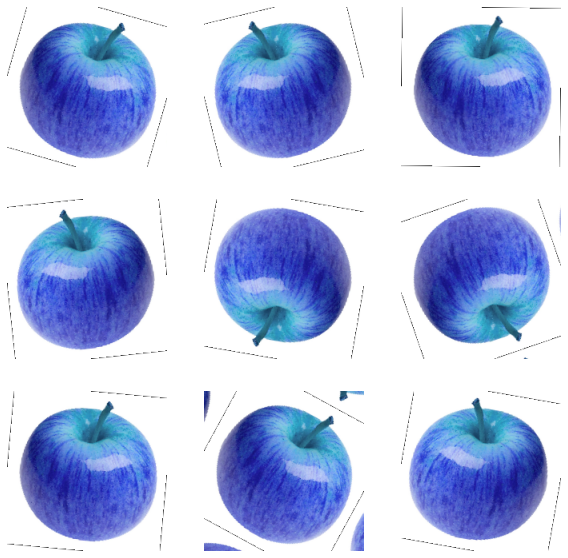

In [7]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(trainImg)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[1])
    plt.axis("off")
print(augmented_image.shape)

In [8]:
trainImg = data_augmentation(trainImg)
print(trainImg.shape)

(240, 200, 200, 3)


In [9]:
# Early Stopping to prevent overfitting 
#What is the monitor to use? 
#'loss' doesnt work as well. @ epoch 30, it is still running. Should i increase the number of epochs?
#'Accuracy' works as it easily hit 100 % accuracy before epoch 30, would this ensure the same results everything?
#'val accuracy is not a very good guage'
callback = tf.keras.callbacks.EarlyStopping(monitor ='accuracy', patience = 2 )
#stop training when there are no improvments in 3 consecv epochs

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 30,
                          kernel_size = (3,3),
                          activation= 'tanh',
                          input_shape=(200,200,3)))
model.add(tf.keras.layers.Conv2D(filters = 30,
                          kernel_size = (3,3),
                          activation = 'tanh'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 30, kernel_size =(3,3), activation ='tanh'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(3,3)))

model.add(tf.keras.layers.Conv2D(filters = 30, kernel_size =(3,3), activation ='tanh'))
model.add(tf.keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(20,activation ='relu'))
model.add(tf.keras.layers.Dense(15, activation ='relu'))
#finish off with softmax
model.add(tf.keras.layers.Dense(4, activation ='softmax'))

In [11]:
model.compile(loss ='categorical_crossentropy',
             optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 30)      840       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8130      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 30)       

In [12]:
history = model.fit(trainImg,trainLabel,batch_size=40, epochs=50, callbacks=[callback])
print(history)
print(len(history.history['accuracy'])) # number of epouchs that run

Epoch 1/50
6/6 [==============================] - 12s 2s/step - loss: 1.3497 - accuracy: 0.3750
Epoch 2/50
6/6 [==============================] - 12s 2s/step - loss: 1.2013 - accuracy: 0.5292
Epoch 3/50
6/6 [==============================] - 11s 2s/step - loss: 0.8298 - accuracy: 0.6250
Epoch 4/50
6/6 [==============================] - 11s 2s/step - loss: 0.7252 - accuracy: 0.6750
Epoch 5/50
6/6 [==============================] - 12s 2s/step - loss: 0.6938 - accuracy: 0.7625
Epoch 6/50
6/6 [==============================] - 11s 2s/step - loss: 0.6288 - accuracy: 0.7958
Epoch 7/50
6/6 [==============================] - 11s 2s/step - loss: 0.6025 - accuracy: 0.8333
Epoch 8/50
6/6 [==============================] - 11s 2s/step - loss: 0.5800 - accuracy: 0.8417
Epoch 9/50
6/6 [==============================] - 11s 2s/step - loss: 0.6003 - accuracy: 0.8458
Epoch 10/50
6/6 [==============================] - 11s 2s/step - loss: 0.6113 - accuracy: 0.8750
Epoch 11/50
6/6 [======================

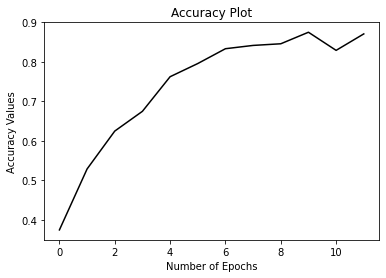

In [13]:
plt.plot(history.history["accuracy"],color="black",label="Train Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Values")
plt.show()

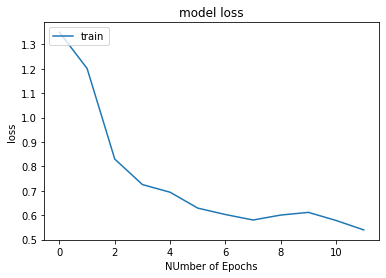

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('NUmber of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

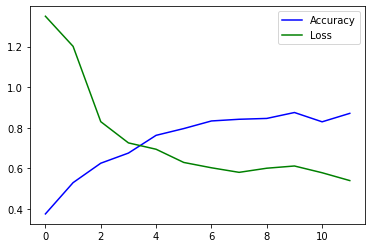

In [15]:
# summarize history for loss and accuracy
plt.plot(history.history['accuracy'],c = 'blue', label = 'Accuracy')
plt.plot(history.history['loss'], c= 'green', label = 'Loss')
ax.set(title = 'Accuracy & Loss', xlabel = 'epochs')
ax.grid()
plt.legend(loc='upper right')
plt.savefig('Accuracy_Loss_Gen.jpg')

In [16]:
scores = model.evaluate(trainImg, trainLabel, verbose = 1)
print("Train Loss: ", scores[0])
print("Train Accuracy: ", scores[1])

8/8 [==============================] - 3s 400ms/step - loss: 0.5070 - accuracy: 0.8958
Train Loss:  0.5069999098777771
Train Accuracy:  0.8958333134651184


In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [18]:
#Evaluate based on training folder and test folder, training labels vs test labels
#88.33% #89.99, 86.66% , 85% (Accuracy varies - why? Can this be solved with early stopping?)
#88.33 (EarlyStopping-Accuracy)
scores = model.evaluate(testImg, testLabel, verbose = 1)
print("Test Loss: ", scores[0])
print("Test Accuracy: ", scores[1])

2/2 [==============================] - 0s 207ms/step - loss: 0.9278 - accuracy: 0.7500
Test Loss:  0.9278001189231873
Test Accuracy:  0.75
